# Challenge 1: Data Exploration
### To complete this challenge:
    1. Download the Adventure Works data files - see previous unit.
    2. Clean the data by replacing any missing values and removing duplicate rows. In this dataset, each customer is identified by a unique customer ID. The most recent version of a duplicated record should be retained.
    3. Explore the data by calculating summary and descriptive statistics for the features in the dataset, calculating correlations between features, and creating data visualizations to determine apparent relationships in the data.
    4. Based on your analysis of the customer data after removing all duplicate customer records, answer the questions below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df1 = pd.read_csv("AW_AveMonthSpend.csv")
df2 = pd.read_csv("AW_BikeBuyer.csv")
df3 = pd.read_csv('AdvWorksCusts.csv')

In [3]:
df_tmp = pd.merge(df1, df2, on = 'CustomerID')
df_tmp

,CustomerID,AveMonthSpend,BikeBuyer
0,11000,89,0
1,11001,117,1
2,11002,123,0
3,11003,50,0
4,11004,95,1
...,...,...,...
16744,29478,65,0
16745,29479,77,0
16746,29480,48,1
16747,29481,65,0


In [4]:
df = pd.merge(df_tmp, df3, on = 'CustomerID')
#df

In [5]:
df.CustomerID.duplicated().sum()

805

In [6]:
df.drop_duplicates(subset = 'CustomerID', keep = 'last', inplace = True)
df

,CustomerID,AveMonthSpend,BikeBuyer,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,11000,89,0,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,...,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947
1,11001,117,1,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,...,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141
2,11002,123,0,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,...,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945
3,11003,50,0,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,...,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688
4,11004,95,1,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,...,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17204,29478,65,0,NaN,Darren,D,Carlson,NaN,5240 Premier Pl.,NaN,...,1959-05-25,Graduate Degree,Clerical,M,S,1,0,0,3,45986
17205,29479,77,0,NaN,Tommy,L,Tang,NaN,"111, rue Maillard",NaN,...,1958-07-04,Graduate Degree,Clerical,M,M,1,0,0,1,80049
17206,29480,48,1,NaN,Nina,W,Raji,NaN,9 Katherine Drive,NaN,...,1960-11-10,Graduate Degree,Clerical,F,S,1,0,0,3,60417
17207,29481,65,0,NaN,Ivan,NaN,Suri,NaN,Knaackstr 4,NaN,...,1960-01-05,Graduate Degree,Clerical,M,S,0,0,0,3,66653


In [7]:
df.CustomerID.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16404 entries, 0 to 17208
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CustomerID            16404 non-null  int64 
 1   AveMonthSpend         16404 non-null  int64 
 2   BikeBuyer             16404 non-null  int64 
 3   Title                 88 non-null     object
 4   FirstName             16404 non-null  object
 5   MiddleName            9453 non-null   object
 6   LastName              16404 non-null  object
 7   Suffix                2 non-null      object
 8   AddressLine1          16404 non-null  object
 9   AddressLine2          273 non-null    object
 10  City                  16404 non-null  object
 11  StateProvinceName     16404 non-null  object
 12  CountryRegionName     16404 non-null  object
 13  PostalCode            16404 non-null  object
 14  PhoneNumber           16404 non-null  object
 15  BirthDate             16404 non-null

In [9]:
df.isnull().sum()
df.isna().sum()

CustomerID                  0
AveMonthSpend               0
BikeBuyer                   0
Title                   16316
FirstName                   0
MiddleName               6951
LastName                    0
Suffix                  16402
AddressLine1                0
AddressLine2            16131
City                        0
StateProvinceName           0
CountryRegionName           0
PostalCode                  0
PhoneNumber                 0
BirthDate                   0
Education                   0
Occupation                  0
Gender                      0
MaritalStatus               0
HomeOwnerFlag               0
NumberCarsOwned             0
NumberChildrenAtHome        0
TotalChildren               0
YearlyIncome                0
dtype: int64

In [10]:
Cols_To_Drop = ['Title', 'MiddleName','Suffix', 'AddressLine2']
df.drop(Cols_To_Drop, axis =1, inplace = True,)
df

,CustomerID,AveMonthSpend,BikeBuyer,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,11000,89,0,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,...,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947
1,11001,117,1,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,...,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141
2,11002,123,0,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,...,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945
3,11003,50,0,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,...,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688
4,11004,95,1,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,...,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17204,29478,65,0,Darren,Carlson,5240 Premier Pl.,Stoke-on-Trent,England,United Kingdom,AS23,...,1959-05-25,Graduate Degree,Clerical,M,S,1,0,0,3,45986
17205,29479,77,0,Tommy,Tang,"111, rue Maillard",Versailles,Yveline,France,78000,...,1958-07-04,Graduate Degree,Clerical,M,M,1,0,0,1,80049
17206,29480,48,1,Nina,Raji,9 Katherine Drive,London,England,United Kingdom,SW19 3RU,...,1960-11-10,Graduate Degree,Clerical,F,S,1,0,0,3,60417
17207,29481,65,0,Ivan,Suri,Knaackstr 4,Hof,Bayern,Germany,95010,...,1960-01-05,Graduate Degree,Clerical,M,S,0,0,0,3,66653


## Question 1
 #### Minimum AveMonthSpend
 
## Question 2
 ####  Maximum AveMonthSpend

## Question 3
#### Mean AveMonthSpend

## Question 5
#### Standard Deviation AveMonthSpend

In [11]:
df.describe()

,CustomerID,AveMonthSpend,BikeBuyer,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
count,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000
mean,20240.143136,72.391002,0.332541,0.674104,1.499756,0.991100,2.004511,78129.672397
std,5340.370705,27.269921,0.471138,0.468723,1.139135,1.514278,1.682318,39728.383493
min,11000.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9482.000000
25%,15617.750000,52.000000,0.000000,0.000000,1.000000,0.000000,0.000000,47808.750000
50%,20231.500000,68.000000,0.000000,1.000000,2.000000,0.000000,2.000000,76125.000000
75%,24862.250000,84.000000,1.000000,1.000000,2.000000,2.000000,3.000000,105211.750000
max,29482.000000,176.000000,1.000000,1.000000,4.000000,5.000000,5.000000,196511.000000


## Question 4
#### Median AveMonthSpend

In [12]:
df.AveMonthSpend.median()

68.0

## Question 6
### The distribution of the values in the BikeBuyer column indicates:
#### a. Fewer customers have bought bikes than have not bought bikes.
#### b. More customers have bought bikes than have not bought bikes.
#### c. The same number of customers have bought bikes as have not bought bikes.

In [13]:
df.BikeBuyer.value_counts()

0    10949
1     5455
Name: BikeBuyer, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16404 entries, 0 to 17208
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CustomerID            16404 non-null  int64 
 1   AveMonthSpend         16404 non-null  int64 
 2   BikeBuyer             16404 non-null  int64 
 3   FirstName             16404 non-null  object
 4   LastName              16404 non-null  object
 5   AddressLine1          16404 non-null  object
 6   City                  16404 non-null  object
 7   StateProvinceName     16404 non-null  object
 8   CountryRegionName     16404 non-null  object
 9   PostalCode            16404 non-null  object
 10  PhoneNumber           16404 non-null  object
 11  BirthDate             16404 non-null  object
 12  Education             16404 non-null  object
 13  Occupation            16404 non-null  object
 14  Gender                16404 non-null  object
 15  MaritalStatus         16404 non-null

## Question 7
### Select the correct order (from lowest to highest) that ranks the median YearlyIncome by Occupation:
    - Clerical, Manual, Skilled Manual, Professional, Management
    - Manual, Skilled Manual, Clerical, Management, Professional
    - Manual, Clerical, Skilled Manual, Professional, Management
    - Manual, Clerical, Skilled Manual, Management, Professional

In [15]:
df_= df

df_ = df_.groupby('Occupation')['YearlyIncome'].median().sort_values()
df_

Occupation
Manual             21722.0
Clerical           49481.0
Skilled Manual     66471.5
Professional       99058.0
Management        118781.0
Name: YearlyIncome, dtype: float64

## Question 8

### Based on their age at the time when the data was collected (1st January 1998),

### which group of customers accounts for the highest AveMonthSpend values?
    - Females under 25 years of age.
    - Males under 25 years of age.
    - Females aged between 25 and 45.
    - Males aged between 25 and 45.
    - Females over 55 years of age.
    - Males over 55 years of age.

In [16]:
df['BirthDate'] = pd.to_datetime(df['BirthDate'])
df['BirthDate']

0       1966-04-08
1       1965-05-14
2       1965-08-12
3       1968-02-15
4       1968-08-08
           ...    
17204   1959-05-25
17205   1958-07-04
17206   1960-11-10
17207   1960-01-05
17208   1959-03-05
Name: BirthDate, Length: 16404, dtype: datetime64[ns]

In [17]:
df['CurrDate'] = pd.to_datetime('1998-01-01')
df

,CustomerID,AveMonthSpend,BikeBuyer,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,...,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,CurrDate
0,11000,89,0,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,...,Bachelors,Professional,M,M,1,0,0,2,137947,1998-01-01
1,11001,117,1,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,...,Bachelors,Professional,M,S,0,1,3,3,101141,1998-01-01
2,11002,123,0,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,...,Bachelors,Professional,M,M,1,1,3,3,91945,1998-01-01
3,11003,50,0,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,...,Bachelors,Professional,F,S,0,1,0,0,86688,1998-01-01
4,11004,95,1,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,...,Bachelors,Professional,F,S,1,4,5,5,92771,1998-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17204,29478,65,0,Darren,Carlson,5240 Premier Pl.,Stoke-on-Trent,England,United Kingdom,AS23,...,Graduate Degree,Clerical,M,S,1,0,0,3,45986,1998-01-01
17205,29479,77,0,Tommy,Tang,"111, rue Maillard",Versailles,Yveline,France,78000,...,Graduate Degree,Clerical,M,M,1,0,0,1,80049,1998-01-01
17206,29480,48,1,Nina,Raji,9 Katherine Drive,London,England,United Kingdom,SW19 3RU,...,Graduate Degree,Clerical,F,S,1,0,0,3,60417,1998-01-01
17207,29481,65,0,Ivan,Suri,Knaackstr 4,Hof,Bayern,Germany,95010,...,Graduate Degree,Clerical,M,S,0,0,0,3,66653,1998-01-01


In [18]:
df['Age'] = ((df['CurrDate'] - df['BirthDate']).dt.days)/365 # gives age in years
#customer_db['Age'] = (current_date - customer_db['BirthDate']).astype('m8[M]')
df

,CustomerID,AveMonthSpend,BikeBuyer,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,CurrDate,Age
0,11000,89,0,Jon,Yang,3761 N. 14th St,Rockhampton,Queensland,Australia,4700,...,Professional,M,M,1,0,0,2,137947,1998-01-01,31.756164
1,11001,117,1,Eugene,Huang,2243 W St.,Seaford,Victoria,Australia,3198,...,Professional,M,S,0,1,3,3,101141,1998-01-01,32.657534
2,11002,123,0,Ruben,Torres,5844 Linden Land,Hobart,Tasmania,Australia,7001,...,Professional,M,M,1,1,3,3,91945,1998-01-01,32.410959
3,11003,50,0,Christy,Zhu,1825 Village Pl.,North Ryde,New South Wales,Australia,2113,...,Professional,F,S,0,1,0,0,86688,1998-01-01,29.898630
4,11004,95,1,Elizabeth,Johnson,7553 Harness Circle,Wollongong,New South Wales,Australia,2500,...,Professional,F,S,1,4,5,5,92771,1998-01-01,29.419178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17204,29478,65,0,Darren,Carlson,5240 Premier Pl.,Stoke-on-Trent,England,United Kingdom,AS23,...,Clerical,M,S,1,0,0,3,45986,1998-01-01,38.632877
17205,29479,77,0,Tommy,Tang,"111, rue Maillard",Versailles,Yveline,France,78000,...,Clerical,M,M,1,0,0,1,80049,1998-01-01,39.523288
17206,29480,48,1,Nina,Raji,9 Katherine Drive,London,England,United Kingdom,SW19 3RU,...,Clerical,F,S,1,0,0,3,60417,1998-01-01,37.167123
17207,29481,65,0,Ivan,Suri,Knaackstr 4,Hof,Bayern,Germany,95010,...,Clerical,M,S,0,0,0,3,66653,1998-01-01,38.016438


In [19]:
df['AgeGroup'] = '' 

df.loc[(df['Age']<25),'AgeGroup']='Under 25'
df.loc[(df['Age']>=25) & (df['Age']<=45), 'AgeGroup']='Between 25 and 45'
df.loc[(df['Age']>45) & (df['Age']<=55), 'AgeGroup']='Between 45 and 55'
df.loc[(df['Age']>55), 'AgeGroup']='Over 55'

df.groupby('AgeGroup').sum()

,CustomerID,AveMonthSpend,BikeBuyer,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age
AgeGroup,,,,,,,,,
Between 25 and 45,202285214,767043,4210,6963,13134,11916,20452,830627010,342712.961644
Between 45 and 55,49083238,179196,502,1750,5160,2746,8146,198088966,120428.441096
Over 55,21179840,63179,41,797,1801,350,2955,89203207,63935.241096
Under 25,59471016,178084,702,1548,4507,1246,1329,163719963,63080.602740


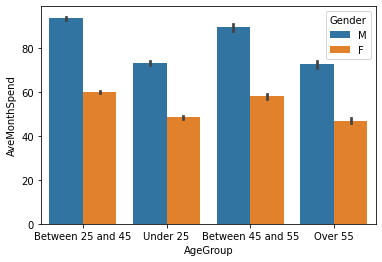

In [20]:
import seaborn as sns

sns.barplot(x = 'AgeGroup', y = 'AveMonthSpend', data = df, hue = 'Gender');

## Question 9

## Which of the following statements about AveMonthSpend are true?
  #####  Married customers have a higher median AvgMonthSpend than single customers. `True`
  ##### Customers with no car have a higher median AvgMonthSpend than customers with three or more cars.
  ##### Male customers have a higher median AvgMonthSpend than female customers. `True`
  ##### Female customers have a wider range of AvgMonthSpend values than male customers.
  ##### Customers with no children at home have a lower median AvgMonthSpend values than customers with one or more children at home.`True` 

In [21]:
df.groupby('MaritalStatus').AveMonthSpend.median()

MaritalStatus
M    74.0
S    62.0
Name: AveMonthSpend, dtype: float64

In [22]:
df.groupby('NumberCarsOwned').AveMonthSpend.median()

NumberCarsOwned
0     65.0
1     63.0
2     64.0
3     92.0
4    100.0
Name: AveMonthSpend, dtype: float64

In [23]:
df.groupby('Gender').AveMonthSpend.median()

Gender
F    52.0
M    79.0
Name: AveMonthSpend, dtype: float64

In [24]:
df.groupby('NumberChildrenAtHome').AveMonthSpend.median()

NumberChildrenAtHome
0     57.0
1     68.0
2     79.0
3     90.0
4    101.0
5    110.0
Name: AveMonthSpend, dtype: float64

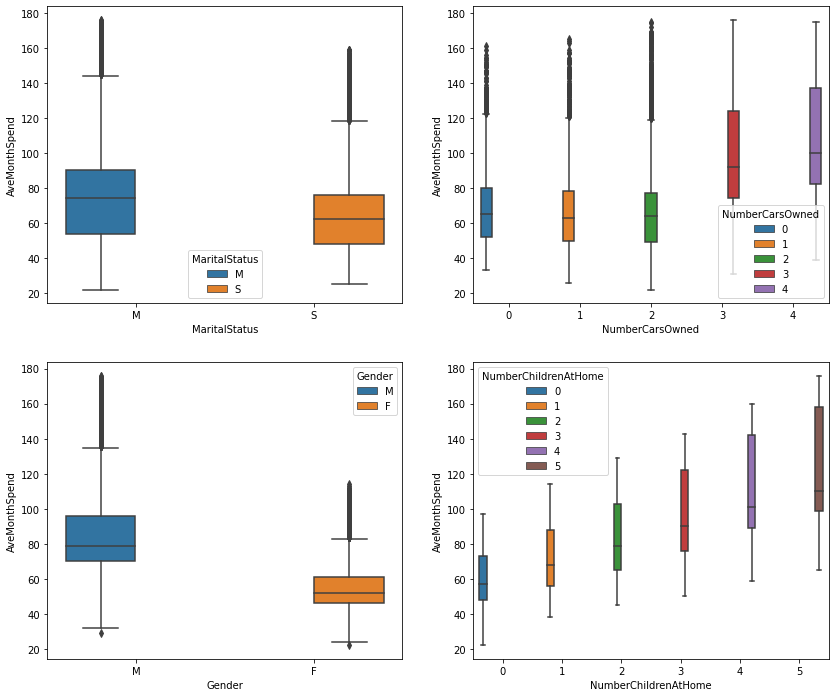

In [25]:
def sns_plot_box(df, cols, col_y = 'AveMonthSpend'):
    i = 1
    fig = plt.figure(figsize = (14,12))
    for col in cols: 
        plt.subplot(2,2, i)        
        sns.boxplot(x = col, y = col_y, data = df, hue = col)         
        i = i+1
        
    plt.show();
    
cols = ['MaritalStatus', 'NumberCarsOwned', 'Gender', 'NumberChildrenAtHome']
sns_plot_box(df, cols)

# Question 10

## Which of the following statements about BikeBuyer are true?
   ##### The median YearlyIncome is higher for customers who bought a bike than for customers who didn't. `True`
   ##### The median number of cars owned by customers who bought a bike is lower than for customers who didn't. 
   ##### The most common occupation type for customers who bought a bike is skilled manual. `True`
   ##### Male customers are more likely to buy bikes than female customers.
   ##### A maried customer is more likely to buy a bike.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16404 entries, 0 to 17208
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerID            16404 non-null  int64         
 1   AveMonthSpend         16404 non-null  int64         
 2   BikeBuyer             16404 non-null  int64         
 3   FirstName             16404 non-null  object        
 4   LastName              16404 non-null  object        
 5   AddressLine1          16404 non-null  object        
 6   City                  16404 non-null  object        
 7   StateProvinceName     16404 non-null  object        
 8   CountryRegionName     16404 non-null  object        
 9   PostalCode            16404 non-null  object        
 10  PhoneNumber           16404 non-null  object        
 11  BirthDate             16404 non-null  datetime64[ns]
 12  Education             16404 non-null  object        
 13  Occupation      

In [27]:
print("Median Yearly Income for BikeBuyer:\n", df.groupby('BikeBuyer').YearlyIncome.median())
print("********************")
print("\n NumberCarsOwned for BikeBuyer:\n", df.groupby('BikeBuyer').NumberCarsOwned.median())
print("********************")
print("\nOccupation wise for BikeBuyer:\n", df.groupby('Occupation').BikeBuyer.sum())
print("********************")
print("\nGender for BikeBuyer:\n", df.groupby('Gender').BikeBuyer.sum())
print("********************")
print("\n MarritalStatus for BikeBuyer:\n", df.groupby('MaritalStatus').BikeBuyer.sum())

Median Yearly Income for BikeBuyer:
 BikeBuyer
0    65957.0
1    96084.0
Name: YearlyIncome, dtype: float64
********************

 NumberCarsOwned for BikeBuyer:
 BikeBuyer
0    1.0
1    2.0
Name: NumberCarsOwned, dtype: float64
********************

Occupation wise for BikeBuyer:
 Occupation
Clerical           616
Management        1016
Manual             504
Professional      2184
Skilled Manual    1135
Name: BikeBuyer, dtype: int64
********************

Gender for BikeBuyer:
 Gender
F    2233
M    3222
Name: BikeBuyer, dtype: int64
********************

 MarritalStatus for BikeBuyer:
 MaritalStatus
M    2199
S    3256
Name: BikeBuyer, dtype: int64


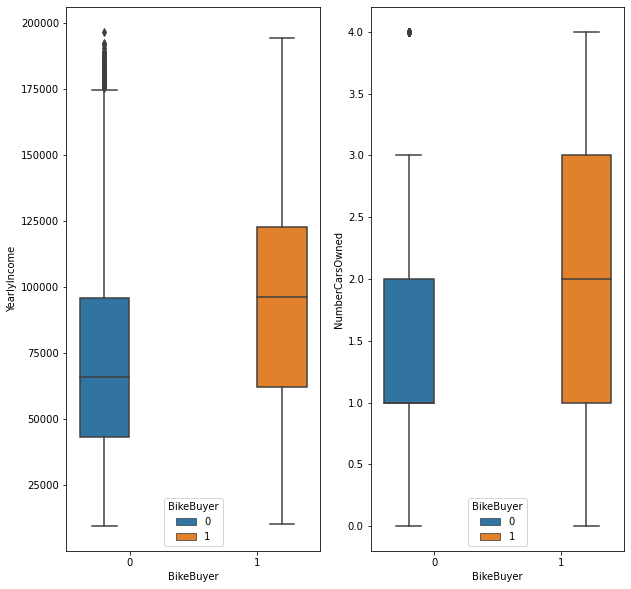

In [28]:
# For median we can use sns box plot 
fig = plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
sns.boxplot(x = 'BikeBuyer', y = 'YearlyIncome', data = df, hue = 'BikeBuyer');

plt.subplot(1,2,2)
sns.boxplot(x = 'BikeBuyer', y = 'NumberCarsOwned', data = df, hue = 'BikeBuyer');
plt.show()

<Figure size 720x720 with 0 Axes>

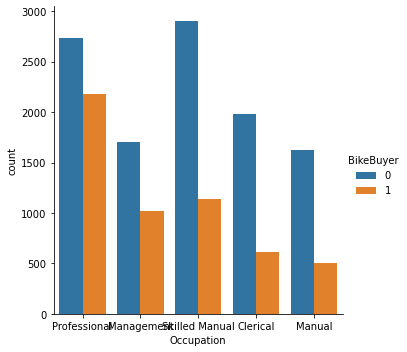

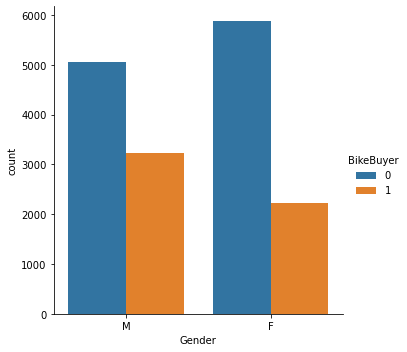

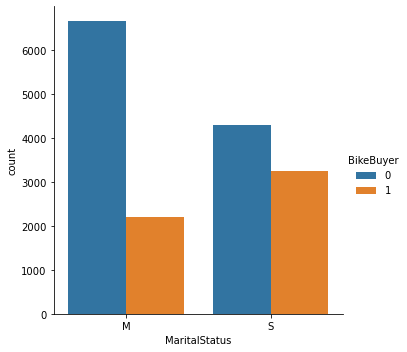

In [29]:
fig = plt.figure(figsize = (10,10));

#Utilizing bar charts to visualize categorical features in separate classes. 
sns.catplot(x='Occupation', kind='count', data=df, hue='BikeBuyer');

sns.catplot(x='Gender', kind='count', data=df, hue='BikeBuyer');

sns.catplot(x='MaritalStatus', kind='count', data=df, hue='BikeBuyer');
plt.show();

In [30]:
df.to_csv("FinalAdv.csv", index = False)